**Общая информация**

**Срок сдачи:** 16 марта 2020, 08:30 

**Штраф за опоздание:** по 1 баллу за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0220, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.datasets import  fetch_20newsgroups

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KDTree
from sklearn.metrics import accuracy_score
from scipy import stats
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.spatial.distance import cdist
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics.pairwise import pairwise_distances


##### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [2]:
class MyKNeighborsClassifier(BaseEstimator):
    
    def __init__(self, n_neighbors, algorithm='brute', metric='euclidean'):
        self.neighbors = n_neighbors
        self.algorithm = algorithm
        self.metric = 'euclidean'
        if metric == 'cosine':
            self.metric = 'cosine'

    def fit(self, X, y):
        self.x_train = X
        self.y_train = y
        if self.algorithm == 'kd_tree':
            self.kdtree = KDTree(self.x_train)
 
    def predict(self, X):
        if self.algorithm == 'brute':
            return stats.mode(
                self.y_train[np.argpartition(self.distance(X), self.neighbors)[:,:self.neighbors]]
                         , axis=1)[0].reshape(-1)
        elif self.algorithm == 'kd_tree':
            return stats.mode(
                self.y_train[self.kdtree.query(X, k=self.neighbors)[1]]
                         , axis=1)[0].reshape(-1)

    def distance(self, X):
        return pairwise_distances(X,self.x_train, metric=self.metric, n_jobs=-2 )
        
#         dist = np.sqrt(np.sum(np.apply_along_axis(
#             lambda  x, x_train: (x_train - x)**2,1,
#                             X, self.x_train),axis=2))
#         return dist


**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [37]:
iris = datasets.load_iris()

In [38]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [39]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [40]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

In [41]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 2 (0.5 балла)**

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [42]:
%time clf.fit(X_train, y_train)

CPU times: user 0 ns, sys: 1.85 ms, total: 1.85 ms
Wall time: 1.41 ms


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [43]:
%time my_clf.fit(X_train, y_train)

CPU times: user 18 µs, sys: 2 µs, total: 20 µs
Wall time: 28.8 µs


In [44]:
%time clf.predict(X_test)

CPU times: user 7.32 ms, sys: 277 µs, total: 7.6 ms
Wall time: 5.06 ms


array([2, 2, 1, 1, 1, 0, 2, 0, 0, 1, 0, 1, 2, 1, 0])

In [45]:
%time my_clf.predict(X_test)

CPU times: user 22.4 ms, sys: 537 µs, total: 23 ms
Wall time: 112 ms


array([2, 2, 1, 1, 1, 0, 2, 0, 0, 1, 0, 1, 2, 1, 0])

###### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [46]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [47]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [48]:
%time clf.fit(X_train, y_train)

CPU times: user 0 ns, sys: 1.23 ms, total: 1.23 ms
Wall time: 4.42 ms


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [49]:
%time my_clf.fit(X_train, y_train)

CPU times: user 382 µs, sys: 0 ns, total: 382 µs
Wall time: 357 µs


In [50]:
%time clf.predict(X_test)

CPU times: user 5.61 ms, sys: 0 ns, total: 5.61 ms
Wall time: 4.44 ms


array([0, 0, 0, 1, 0, 1, 2, 2, 0, 1, 1, 2, 1, 2, 2])

In [51]:
%time my_clf.predict(X_test)

CPU times: user 1.91 ms, sys: 159 µs, total: 2.07 ms
Wall time: 1.58 ms


array([0, 0, 0, 1, 0, 1, 2, 2, 0, 1, 1, 2, 1, 2, 2])

In [52]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 4 (2.5 балла)**

Рассмотрим новый датасет 20 newsgroups

In [53]:
train_newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [54]:
train_data = train_newsgroups['data']
train_target = train_newsgroups['target']

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [55]:
vectorizer = CountVectorizer()          
vectors = vectorizer.fit_transform(train_data)     
vectors = vectors.astype(np.float)

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [56]:
def cross_val(n_neighbors, vector, target, metric='euclidean', algorithm='brute'):
    scores = []
    skf = StratifiedKFold(n_splits=3)
    for train_index, test_index in skf.split(vector, target):
        X_train, X_test = vector[train_index], vector[test_index]
        y_train, y_test = target[train_index], target[test_index]
        clf = MyKNeighborsClassifier(n_neighbors=n_neighbors, algorithm=algorithm, metric=metric)
        clf.fit(X_train, y_train)
        my_clf_pred = clf.predict(X_test)
        scores.append(accuracy_score(y_test, my_clf_pred))
    return sum(scores)/len(scores)

In [57]:
cross_val(1, vectors, train_target, metric='euclidean')

0.2064692938965811

In [58]:
# import autoreload
# # %load_ext autoreload
# %autoreload

Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

In [59]:
def max_accuracy(vector, target, metric='euclidean'):
    scores = []
    for k in range(1,11):
        scores.append((cross_val(k, vector, target, metric),k))
    return max(scores)

In [60]:
max_accuracy(vectors, train_target)

(0.2064692938965811, 1)

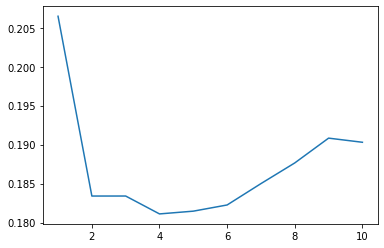

In [61]:
plt.plot(range(1,11),[cross_val(k, vectors, train_target) for k in range(1,11)])

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

In [62]:
max_accuracy(vectors, train_target, metric='cosine')

(0.2922933769194617, 1)

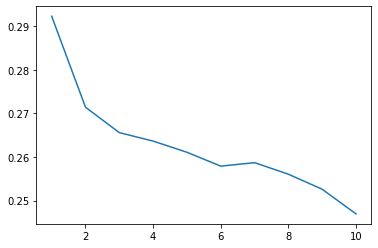

In [63]:
plt.plot(range(1,11),[cross_val(k, vectors, train_target, metric='cosine') for k in range(1,11)])

In [64]:
tfvectorizer = TfidfVectorizer()          
tfvectors = tfvectorizer.fit_transform(train_data)     
tfvectors = tfvectors.astype(np.float)

In [65]:
max_accuracy(tfvectors, train_target, metric='cosine')

(0.5957317107565182, 1)

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [66]:
test_newsgroups = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])

In [67]:
test_data = test_newsgroups['data']
test_target = test_newsgroups['target']


In [68]:
tfvectorizer = TfidfVectorizer()          

tfvectorizer.fit(train_data)     
tfvectors_test = tfvectorizer.transform(test_data)     
tfvectors_train = tfvectorizer.transform(train_data)     

tfvectors_test = tfvectors_test.astype(np.float)
tfvectors_train = tfvectors_train.astype(np.float)

Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

In [69]:
clf = MyKNeighborsClassifier(n_neighbors=1, algorithm='brute', metric='cosine')
clf.fit(tfvectors_train, train_target)
my_clf_pred = clf.predict(tfvectors_test)
accuracy_score(test_target, my_clf_pred)

0.5088953797132236

На валидационной выборке точность соcтавляла 0.5957317107565182. На тесте хуже - 0.5088953797132236
На мой взгляд так получилось, потому что на валидационной выборке у нас был словарь (fit TfidfVectorizer) по общей выборке а здесь он получается ограничен train.
Второй момент возможно просто test выборка хуже обрабатывается этой моделью - проведем на ней кросс валидацию так же как мы делали на train:

In [70]:
tfvectorizer = TfidfVectorizer()          
tfvectors_test = tfvectorizer.fit_transform(test_data)     
tfvectors_test = tfvectors_test.astype(np.float)

max_accuracy(tfvectors_test, test_target, metric='cosine')

(0.5643760354171712, 1)

Точность ниже чем при аналогичных действиях на train 0.5957317107565182